# Connectivity Inference V2

This notebook applied the V2 of the connectivity inference on the adEx implementation of Taehoon of "Susin, Eduarda, and Alain Destexhe. 2021."

In [1]:
############################
######## SETUP  ###########

#####  General Imports ######
import numpy as np
from brian2 import *
from matplotlib import pyplot
import sys
import networkx

##### setup interactive ####
%matplotlib notebook 

In [2]:
#### Simulation Scripts #####
sys.path.append('../simulations/')
from wp2_adex_model_script import * 

###### Utility Scripts #####
sys.path.append('../tools')
#import wp2_util as  wp2_util

In [3]:
###########################
####### RUN SIMULATION ####

### choose parameters ###
params = dict()
params['sim_time'] = float(30) # simulation time in seconds 
params['a'] = float( 4*10**(-9))    # subthreshold adaption constant [Siemens]
params['b'] = float(0.0805 * 10**(-9)) # spike-triggert adaption constant [A ]
params['N'] = int(10) #  no of neurons
params['ge']=float(4) # excitatory synaptic conductance [nS ??] - [VALUE ???]
params['gi']=float(4) # inhibitory synaptic conductance [nS ??] - [VALUE ???]

root_dir = 'simData'

curr_dir = root_dir + '/' + str(params['N'])

#if(not(os.path.exists(curr_dir))):
#    os.makedirs(curr_dir)

params['save_fol'] = curr_dir


# run simulation
#trace, spikes, S = simpleNetV2(n, p, c, t, ws, tauw, a, b, Vr) # Regular spiking 
result = run_sim(params)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.03s, trying other methods took 0.22s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.17s). [brian2.stateupdaters.base.method_choice]


The time difference is : 52.970059696999996
[ 20.4  21.   21.5  21.9  22.5  23.1  24.   24.4  37.3  43.1  44.6  44.9
  45.4  46.1  57.   57.6  57.8  66.2  66.8  66.9  66.9  67.   69.2  71.1
  71.2  75.5  76.1  76.2  76.2  76.3  78.   89.2  89.4  89.5  89.5  89.5
  89.8  89.8  90.   98.7  98.9  99.3  99.5  99.5  99.5 102.9 103.4]
[ 7.5 14.1 18.8 22.4 30.9 37.8 43.  49.8 54.7 63.6 65.1 67.4 67.6 71.
 71.9 80.3 84.2 86.2 88.3 91.4 91.5 94.6 99.9]
simulation successfullly ran for 10_4e-09_8.05e-11_30.0_4.0_4.0


<IPython.core.display.Javascript object>


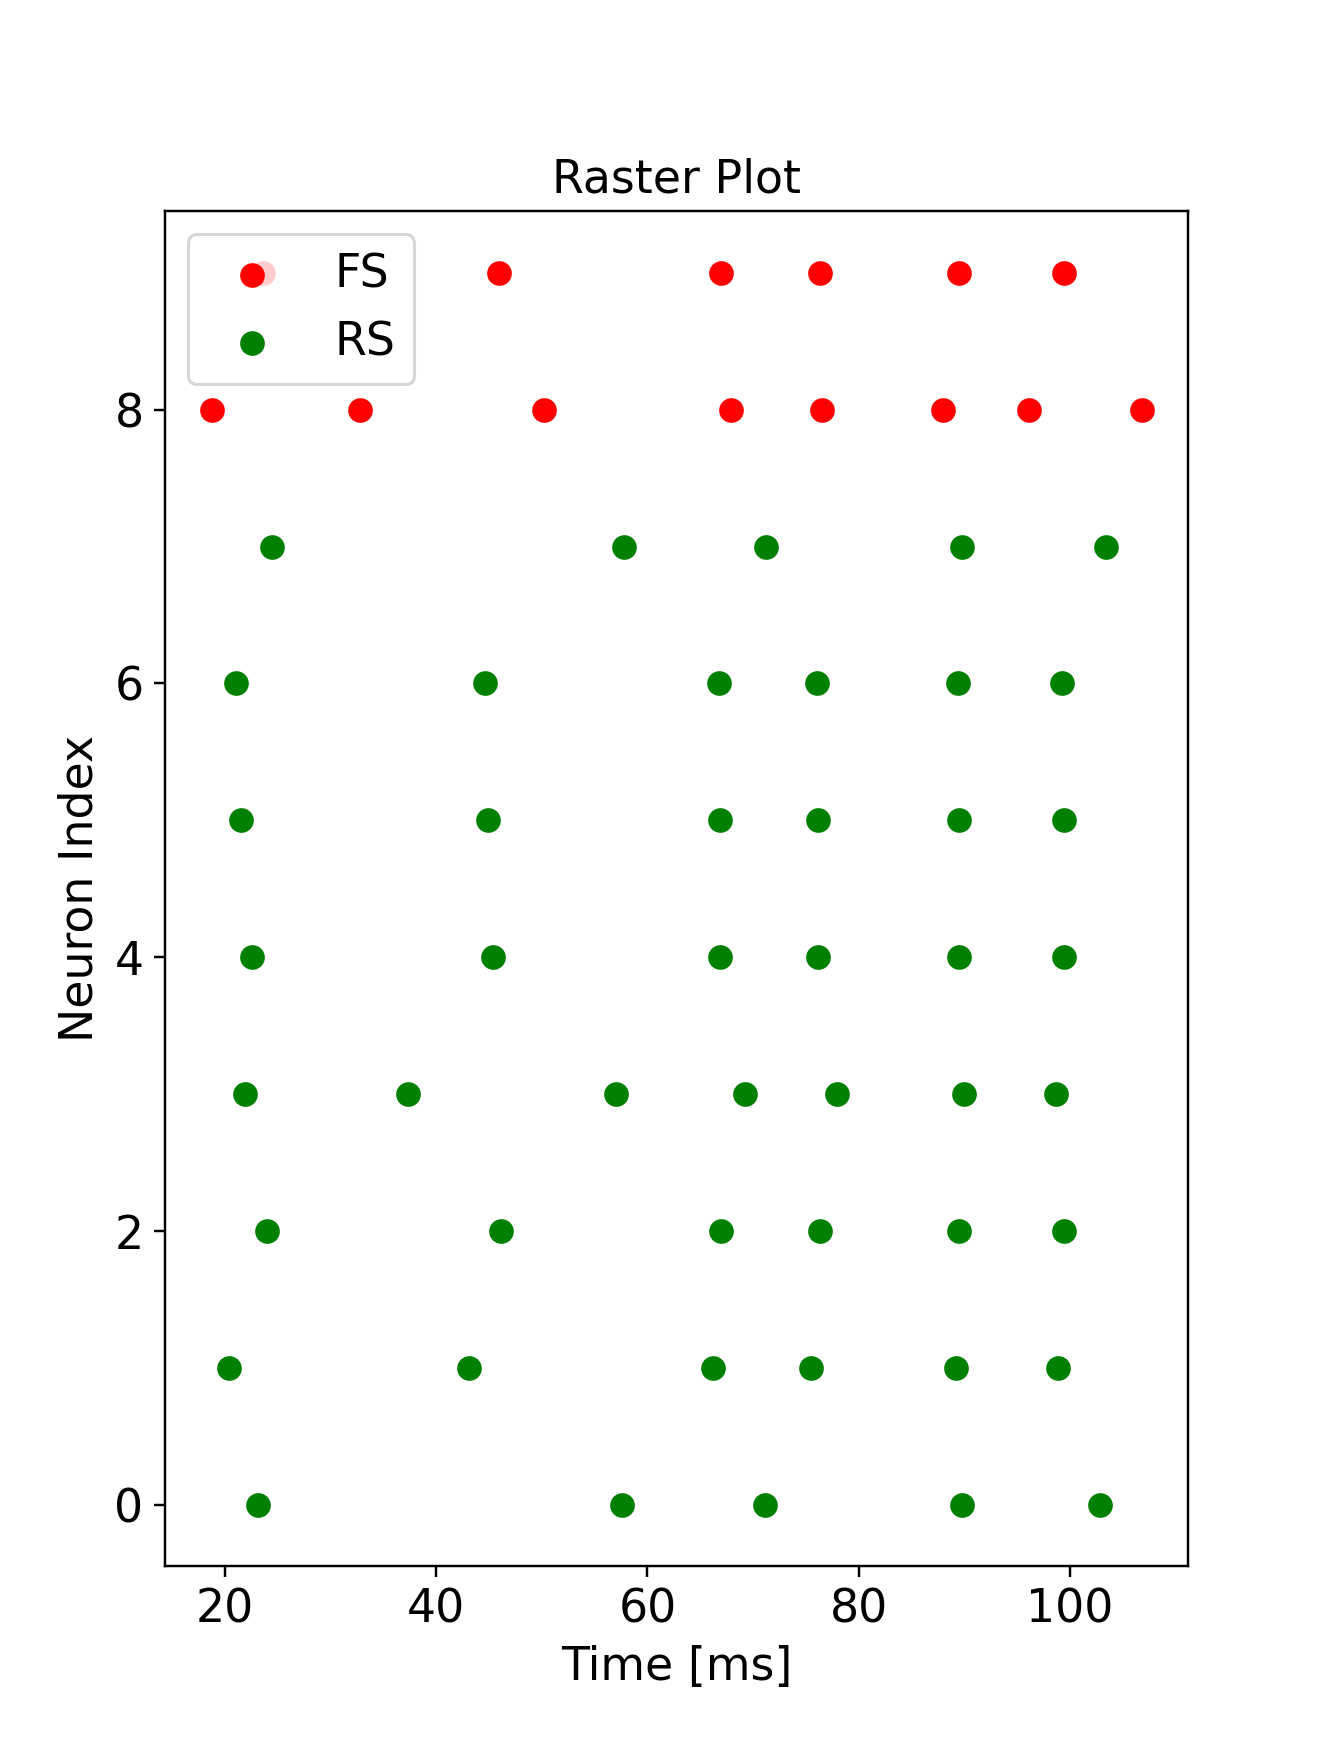

<IPython.core.display.Javascript object>


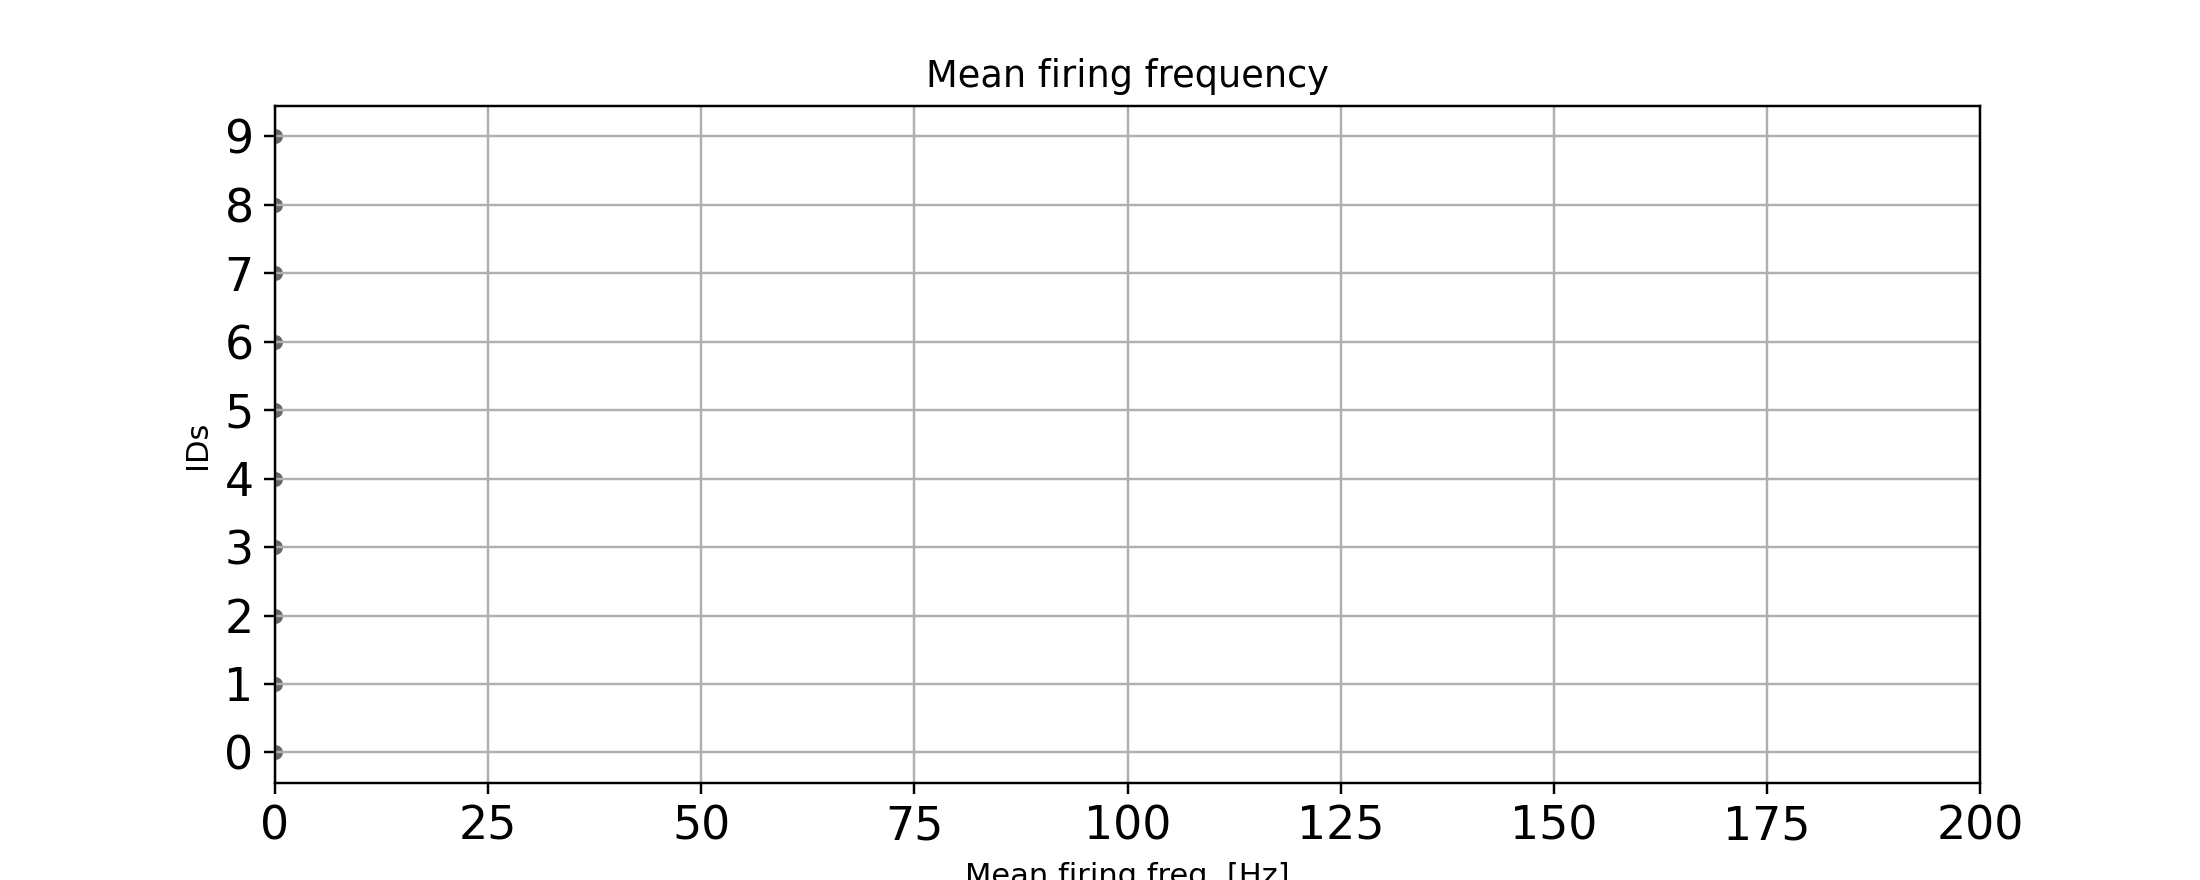

In [4]:
###########################
####### SHOW DATA #########

##### raster plot
Fig=plt.figure(figsize=(6,8))
plt.subplots_adjust(hspace=0.7, wspace=0.4)

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 


figa=Fig.add_subplot()
plt.title('Raster Plot', fontsize=15)
plt.scatter(  result['in_time'], result['in_idx'], color='red',s=50,label="FS")
plt.scatter(  result['ex_time'], result['ex_idx'], color='green',s=50,label="RS")
plt.legend(loc='best', fontsize=15)
plt.xlabel('Time [ms]', fontsize=15)
plt.ylabel('Neuron Index', fontsize=15) 

##### mean fireing freq.
fig = pyplot.figure(figsize=(10,4))

index, counts = np.unique( result['ex_idx'], return_counts=True)
pyplot.scatter(counts/1000, index , s=15, c=[[.4,.4,.4]], label="RS")

index, counts = np.unique(result['in_idx'], return_counts=True)
pyplot.scatter(counts/1000, index , s=15, c=[[.4,.4,.4]], label="FS")


pyplot.yticks(np.arange(0,result['NI']+result['NE'], 1)) # tick every 1 neuron(s)
pyplot.xlim([0,200])
pyplot.ylabel('IDs')
pyplot.xlabel('Mean firing freq. [Hz]')
pyplot.title('Mean firing frequency')
pyplot.grid()
pyplot.show()